## NLP with DL

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer    # Tensorflow un Tokenizer fonksiyonu
from tensorflow.keras.preprocessing.sequence import pad_sequences    # modele vereceğimiz squence lerin aynı boyutta olmasını sağlıyor.

In [2]:
df = pd.read_csv('hepsiburada.csv')

In [3]:
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


NLP de Missing Value yu doldurma şekli bulunmamaktadır. Veriyi çoğaltma teknikleri bulunmaktadır. 

In [5]:
df.Rating.value_counts()

1    229821
0     13676
Name: Rating, dtype: int64

Burada 1 olumlu iken 0 olumsuz yorumları ifade etmektedir. 
Hedef Label ın 1 olması daha doğru bir yaklaşımdır.
Model.fit olarak çalışmaya başladığı zaman Val_recal ve recall değerleri her zaman 1 i takip ederler.

In [6]:
df.Rating = df.Rating.map({1:0, 0:1})

Bu kod, bir Pandas DataFrame'deki "Rating" sütununu dönüştürmek için kullanılır. Verilen kod satırı, "Rating" sütunundaki değerleri belirli bir eşleme mantığına göre değiştirir. Eşleme mantığına göre, 1 olan değerler 0'a dönüştürülür ve 0 olan değerler 1'e dönüştürülür. Bu tür bir dönüşüm, verileri farklı bir format veya kodlama ile uyumlu hale getirmek veya belirli bir analiz veya işlem için özel bir işaretleme yapmak için kullanılabilir. Bu durumda, 1 ve 0 değerleri arasında bir dönüşüm gerçekleşmektedir.

In [7]:
df.Rating.value_counts()

0    229821
1     13676
Name: Rating, dtype: int64

In [8]:
pd.Series(df.Rating).value_counts(normalize=True)

0    0.943835
1    0.056165
Name: Rating, dtype: float64

Bu kod satırı, bir Pandas DataFrame'deki "Rating" sütunundaki değerlerin sıklığını normalize ederek gösterir. Bu kodun her adımını açıklayalım:

df.Rating: DataFrame içindeki "Rating" sütununu seçer.

pd.Series(...): Seçilen sütunu bir Pandas Serisi'ne dönüştürür. Bu, Seri üzerinde çeşitli işlemleri gerçekleştirmenizi sağlar.

value_counts(): Bu metod, Seri içindeki benzersiz değerlerin sayısını ve her bir değerin sıklığını hesaplar. Yani, "Rating" sütunundaki her benzersiz değerin kaç kez tekrarlandığını sayar.

normalize=True: Bu parametre, sonuçların normalize edilmesini sağlar. Yani, her bir değerin toplam sayıya oranı hesaplanır. Sonuç, yüzde cinsinden ifade edilir.

Sonuç olarak, bu kod satırı size "Rating" sütunundaki her benzersiz değerin yüzdelik sıklığını verir. Bu, veri dağılımını analiz etmek ve sütundaki değerlerin oranlarını anlamak için kullanışlı bir bilgi sağlar.

normalize=True: value_counts() fonksiyonuna normalize=True parametresi verilir. Bu, sonuçların yüzdelik cinsinden normalize edilmesini sağlar. Her bir değerin toplam değerlere oranı olarak ifade edilir.

ÇOK DENGESİZ BİR DATA SETİ 

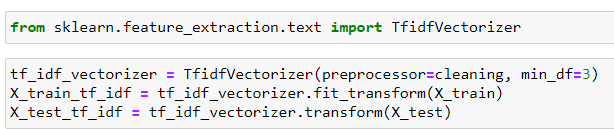

## Tokenization

In [9]:
X = df['Review'].values    # Deep Learning de datayı arraya çevirmek için .values ekliyoruz.
y = df['Rating'].values

Bu şekilde, DataFrame verileri NumPy array'ine dönüştürülerek, derin öğrenme modeline giriş olarak kullanılabilir.

In [10]:
num_words= 15000   # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 

In [11]:
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 
# None değeri atanırsa tüm kelimeler dikkate alınır.

num_words parametresini kullanmak, yalnızca belirli bir sayıda en yaygın kullanılan kelimenin Tokenizer tarafından tanınmasını ve diğerlerinin göz ardı edilmesini sağlar. Bu, bellek kullanımını kontrol altına alır ve modelin daha fazla anlamlı bilgiye odaklanmasını sağlar. Bu nedenle, büyük veri kümesiyle çalışırken veya bellek sınırlamalarıyla karşılaşırken num_words parametresini kullanmak faydalı olabilir.

Burada Tokenizer sınıfını kullanarak bir metin verisini işleyecek bir tokenizer nesnesi oluşturuyorsunuz. num_words parametresi, kaç kelimeyi göz önünde bulunduracağınızı belirlemek için kullanılır.

Tokenizer sınıfı, metin verilerini sayılara dönüştürmek ve daha sonra bu sayıları modelin girdisi olarak kullanmak için kullanılır. num_words parametresi, en sık kullanılan kelimelerin sayısını sınırlamaya yardımcı olur. Yani, num_words değeri kadar en sık kullanılan kelimeleri seçer ve diğer kelimeleri göz ardı eder.

Örneğin, num_words=15000 olarak ayarladığınızda, tokenizer en sık kullanılan 15,000 kelimeyi dikkate alacak ve geri kalan kelimeleri görmezden gelecektir. Bu, daha fazla kelimenin işlenmesi ve gereksiz bilginin tutulmasının önlenmesi açısından faydalı olabilir, özellikle büyük bir sözcük dağarcığına sahipseniz.

SADECE İLK 15.000 E TOKENIZER İŞLEMİ YAPILMIŞ OLUYOR..

In [12]:
tokenizer.fit_on_texts(X)     # Tensorflow un kendisinin geliştirdiği Tokenizer fonksiyonu... #otomatik olarak lower yapıyor..

Deep learning de lemmatization ve stemming yapılmıyor !

## Creating word index

EN ÇOK KULLANILANLARI EN ÇOK KULLANIM SIKLIĞINA GÖRE SIRALAMAYA SOKUYOR.

In [13]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [14]:
word_index = tokenizer.word_index

tokenizer.fit_on_texts(X) ve tokenizer.texts_to_sequences(X) iki farklı işlemi temsil eder ve farklı amaçlar taşır:

tokenizer.fit_on_texts(X):

Bu işlem, verilen metin verisi (X) üzerinden çalışır ve Tokenizer'ın içsel sözcük indekslerini oluşturur.
Her kelimenin bir sayı ile eşleştirildiği bir sözlük oluşturur. Bu sözlük, metindeki her benzersiz kelimenin sayısal bir indeksi ile ilişkilendirilmesini sağlar.
Bu işlem, Tokenizer'ın metindeki kelimeleri sayısal dizilere dönüştürmek için hangi indeksleri kullanacağını belirler.
Genellikle, eğitim verisi üzerinde yapılır ve eğitim verisi içindeki tüm benzersiz kelimelerin Tokenizer tarafından tanınmasını sağlar.
tokenizer.texts_to_sequences(X):

Bu işlem, Tokenizer tarafından tanınan kelimeleri kullanarak verilen metin verisini sayısal dizilere dönüştürür.
fit_on_texts(X) işlemi tamamlandıktan sonra kullanılabilir çünkü Tokenizer artık metindeki kelimeleri anlar.
Her kelimeyi ilgili sayısal indeksiyle değiştirir ve her cümleyi veya metni sayısal dizilere dönüştürür.
Bu işlem, metin verisini makine öğrenimi modellerine veya derin öğrenme modellerine beslemek için kullanılır.
Özetle, fit_on_texts(X) Tokenizer'ın metindeki kelimeleri anlamasını sağlar, texts_to_sequences(X) ise Tokenizer tarafından tanınan kelimeleri kullanarak metin verisini sayısal dizilere dönüştürür. İkinci adımı gerçekleştirebilmek için önce birinci adımı tamamlamak gerekmektedir.







## Converting tokens to numeric

In [15]:
X_num_tokens = tokenizer.texts_to_sequences(X)   # TEXT IMI TOKENIZE IŞLEMİNE TABİ TUT.

tokenizer.texts_to_sequences(X) kod satırı, bir metin verisini sayısal dizilere dönüştürmek için kullanılır. İşte bu kod satırının ne yaptığını adım adım açıklayalım:

tokenizer: Önceden tanımlanmış bir Tokenizer nesnesi. Bu nesne, metin verisini dönüştürmek için kullanılan Tokenizer'dır.

X: Dönüştürülmek istenen metin verisi. Bu metin verisi, bir liste veya bir dizi içinde bulunmalıdır. Her bir öğe, bir metin belgesini veya cümleyi temsil eder.

tokenizer.texts_to_sequences(X): Bu metod, Tokenizer nesnesini kullanarak metin verisini sayısal dizilere dönüştürür. Her kelimenin veya tokenin (metindeki her bir öğenin) bir sayı ile temsil edildiği bir dizi oluşturur. Her kelime, bu dizide belirli bir sayısal değere sahiptir. Bu, metin verisini sayısal olarak temsil etmek için kullanışlıdır ve genellikle makine öğrenimi modellerine beslemek için gereklidir.

In [16]:
X_num_tokens

[[52, 462, 1617, 4510],
 [52, 462, 55, 584],
 [4,
  234,
  29,
  150,
  1,
  76,
  3717,
  1698,
  274,
  82,
  4689,
  10517,
  77,
  187,
  295,
  2020,
  8,
  262,
  5957,
  433,
  1,
  7,
  280,
  1041,
  8857,
  11,
  648,
  78,
  1221,
  225,
  23,
  5,
  1763,
  1,
  1568,
  64,
  68,
  1,
  6,
  5,
  1754,
  893,
  127,
  288,
  1348,
  119,
  20,
  3684,
  5028,
  31,
  172,
  4077,
  4859,
  1930,
  9977,
  25,
  8329,
  3,
  5,
  9977,
  57,
  1696,
  174,
  595,
  16,
  1816],
 [343, 253, 97, 11641, 33, 2623, 55],
 [494, 1, 1, 6, 1350, 53],
 [14, 7],
 [1, 24, 2, 4, 3, 67, 13, 22, 72, 3480, 917, 17, 3, 1, 81],
 [164, 65, 1049, 55, 2075, 13779, 149, 6989, 4510, 65, 339, 11, 1855, 99, 178],
 [4,
  494,
  208,
  8,
  1,
  22,
  771,
  330,
  38,
  186,
  262,
  18,
  367,
  1863,
  3,
  494,
  208,
  8,
  995,
  587,
  651,
  176,
  1147,
  11148,
  65,
  184,
  164,
  250,
  85,
  389,
  26,
  192,
  1856,
  262,
  884,
  34],
 [19,
  2,
  921,
  7547,
  4954,
  160,
  23,
  5

In [17]:
X[105]

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [18]:
print(X_num_tokens[105])

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


In [19]:
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}
word = reverse_word_index[1]
print(word)


çok


In [20]:
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}
word = reverse_word_index[1816]
print(word)

logitech


In [21]:
len(X_num_tokens[105])

22

In [22]:
len(X_num_tokens[106])

18

In [23]:
len(X_num_tokens[6150])

88

BÜTÜN YORUMLARDAKİ TOKENLERİN SAYISINI TESPİT ETMEK İÇİN:

In [24]:
num_tokens = [len(tokens) for tokens in X_num_tokens] # X_num_tokens deki (yorumlardaki) her bir tokeni al ve say...
num_tokens = np.array(num_tokens)   # mean, max etc gibi işlemleri daha rahat yapabilmek için array a çevirdik.

Bu kod, bir metin veri kümesindeki her bir örneğin kelime sayısını hesaplamak için bir döngü kullanır ve ardından elde edilen sayıları bir NumPy dizisine dönüştürür.

İşlevin adımları aşağıdaki şekildedir:

num_tokens = [len(tokens) for tokens in X_num_tokens]: Bu döngü, X_num_tokens listesindeki her bir tokens öğesi için, len(tokens) ifadesini kullanarak o örnekteki kelime sayısını hesaplar. X_num_tokens bir liste olduğunu varsayalım ve her bir öğe bir metin belgesini tokenlara bölen bir işlem tarafından dönüştürülmüş bir token dizisidir.

num_tokens = np.array(num_tokens): Hesaplanan kelime sayılarını içeren num_tokens listesini bir NumPy dizisine dönüştürmek için np.array() fonksiyonunu kullanır. Bu, sayıları daha kolay işlemek ve analiz etmek için NumPy'nin sunduğu işlevleri kullanabilmemizi sağlar.

Sonuç olarak, bu kod parçası, metin veri kümesindeki her bir örneğin kelime sayısını hesaplar ve bu sayıları bir NumPy dizisine dönüştürür. Bu, örneklere ilişkin kelime sayılarını analiz etmek ve istatistiksel bilgileri hesaplamak için kullanılabilir.

In [25]:
num_tokens

array([ 4,  4, 66, ...,  4, 10, 38])

In [26]:
random_sample = np.random.choice(num_tokens)

print(random_sample)

23


In [27]:
len(num_tokens)

243497

## Maximum number of tokens for all documents

In [28]:
num_tokens.mean()

21.36101060793357

In [29]:
num_tokens.max()

298

In [30]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

21941

In [31]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [32]:
len(X_num_tokens[21941])

298

In [33]:
list = [5, 4, 8, 9, 12, 15]
print(np.array(list) < 10)    
print(sum(np.array(list) < 10))    # 5,8,9 toplamda 3 tane
print(sum(np.array(list) < 10)/len(list))   # 3 / 6 = 0.5

[ True  True  True  True False False]
4
0.6666666666666666


In [34]:
max_tokens = 65

In [35]:
sum(num_tokens < max_tokens) / len(num_tokens)  # 235.221 / 243.497 

0.9660119015840031

In [36]:
sum(num_tokens < max_tokens)

235221

In [37]:
len(num_tokens)

243497

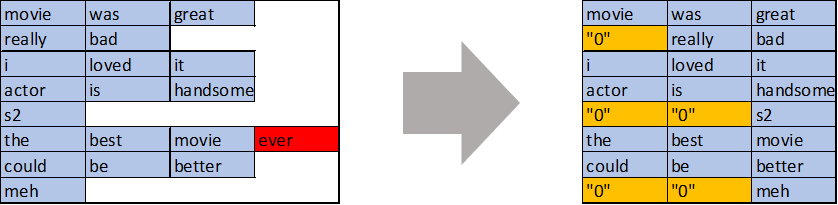

## Fixing token counts of all documents (pad_sequences)

In [38]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)   # sabitleme 

Bu kod, bir metin veri kümesindeki metin örneklerini bir dizi tokena göre belirli bir maksimum uzunluğa (max_tokens) kadar doldurur (pad) veya kırpır (truncate) işlemi yapar.

İşlevin adımları şu şekildedir:

X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens): pad_sequences fonksiyonu, X_num_tokens olarak verilen bir metin veri kümesindeki her bir örneği, maxlen parametresine belirtilen maksimum uzunluğa kadar doldurur veya kırparak bir dizi haline getirir.

X_num_tokens: Metin veri kümesindeki her bir örneğin token dizilerini içeren bir liste.
maxlen: Doldurma veya kırpmadan sonra hedeflenen maksimum token sayısı.
pad_sequences fonksiyonu, daha kısa olan token dizilerini baştan veya sondan sıfırlarla (0) doldurarak aynı uzunluğa getirir. Daha uzun olan token dizileri ise kırpılır, yani maksimum uzunluğa kadar kesilir.

X_pad: Doldurulmuş veya kırpılmış token dizilerini içeren bir NumPy dizisi olarak atanan değişken.

Sonuç olarak, bu kod, metin veri kümesindeki her bir örneği belirli bir maksimum token sayısına (max_tokens) göre doldurur veya kırparak yeni bir dizi oluşturur. Bu, metin verilerinin sabit bir uzunluğa sahip olmasını sağlar ve daha sonra makine öğrenmesi modellerine beslemek için kullanılabilir.

In [39]:
X_pad.shape

(243497, 65)

In [40]:
np.array(X_num_tokens[800])

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [41]:
X_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   19,  341,   52,  194,   30,   54, 7992,   55,  209,  603,
       7887,    3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,
          2,  380,  326,    3,    1,   81,  132,  562,    9,   10])

In [42]:
np.array(X_num_tokens[21941])

array([  145,     5,  5876,  2225,  1653,   902,   203,     1,     6,
        2958,   163,  4248,   374,  3449,  1521, 12582,     3,  1381,
           1,   491,   281,   140,     1,   491,  3391,  2388,   235,
          21,    82,   756,    31,   212,  4458,  1448,    14,     6,
         472,   609,  2159,    14,    15,   673,  1681,  2152,     3,
         313,   444,   261,    13,   561,   463,   470,  1664,   168,
         639,   519,  3209,  5455,  6409,   600,   625,   153,    38,
         194,   272,   635,   389,   140,    26,    52,    40,   272,
          15,    84,    38,   466,  1679, 12350,  1036,   999,     3,
          96,     2,   318,    34,   134,   169,    40,  2752,     3,
          77,   750,   168,   881,     3,   509,   571,   359,   195,
           1,   491,     3,   172,    82,   256,  6460,    45,   926,
         195,  2061,  6575,   603,  7031,   235,    21,   103,   931,
         136,   394,  1316,  1917,     5,  2167,   567,  1034,  2217,
          26,   335,

In [43]:
X_pad[21941]   # UZUN OLANLARDA SON 65 İ ALIYOR.. 

array([  34,  902, 1869,  287,  872, 3501,  537, 1804,  488, 2218,   75,
        163,    2,  456,   13, 1308, 1865, 3432,    5,  824, 7798,  836,
       1640, 7838, 3344,   12, 1308,   31, 3063,  299, 2704,  851, 1052,
         39, 1490, 3436,  317, 1170,   75,  537,   50,  327,  246, 1322,
        120,    2, 3436, 7527,  199,  260,  579, 6176, 1800,   13,   45,
        808,  108,    3,  865,  749, 5840,   50,  106,   76,  879])

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=0)

## Modelling

In [46]:
#pip install gensim

In [47]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors     

In [48]:
glove_model = 'glove.6B.100d.txt'

In [49]:
word2vec = 'glove.6B.100d.glove'
glove2word2vec(glove_model, word2vec)

C:\Users\mertu\AppData\Local\Temp\ipykernel_15380\2553352563.py:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_model, word2vec)


(400000, 100)

In [50]:
from gensim.models import KeyedVectors

# GloVe modelini yükleyin (Word2Vec formatına dönüştürmüş olsanız bile kullanabilirsiniz)
glove_model = KeyedVectors.load_word2vec_format('glove.6B.100d.glove', binary=False)

In [51]:
import numpy as np

embedding_dim = 100  # GloVe kelime gömme vektörlerinin boyutu
embedding_matrix = np.zeros((num_words, embedding_dim))  # num_words, kelime sayısına eşit olmalı

for word, i in word_index.items():
    if i >= num_words:
        continue
    if word in glove_model:
        embedding_vector = glove_model[word]
        embedding_matrix[i] = embedding_vector

Bu kod, bir kelime gömme matrisi (embedding matrix) oluşturmak için kullanılır ve bu matris, GloVe kelime gömme vektörleri ile doldurulur. İşte kodun ayrıntılı açıklaması:

embedding_dim = 100: Bu değişken, kelime gömme vektörlerinin boyutunu belirtir. Yani her kelime için 100 özellikli bir vektör kullanılıyor.

embedding_matrix = np.zeros((num_words, embedding_dim)): Bu satır, tüm kelime gömme vektörlerini içerecek bir matris oluşturur. num_words kelimenin olduğu bir kelime indeksi (word index) sözlüğü varsayılmıştır. Matris başlangıçta sıfırlarla dolu olur.

for word, i in word_index.items():: Bu döngü, kelime indeksleri sözlüğünün her öğesini dolaşır. word kelimenin kendisini temsil ederken, i kelimenin indeksini temsil eder.

if i >= num_words: continue: Eğer kelime indeksi, num_words'den büyük veya eşitse, bu kelimeyi atlayarak bir sonraki kelimeye geçer. Bu, kelime gömme matrisinin boyutunu aşan kelime vektörlerini önlemek içindir.

if word in glove_model:: Eğer kelime, GloVe modelinde bulunuyorsa, bu kelimenin GloVe kelime gömme vektörünü alır.

embedding_matrix[i] = embedding_vector: Son olarak, kelime indeksi i'yi kullanarak ilgili kelime gömme vektörünü embedding_matrix matrisine yerleştirir. Bu, kelimenin GloVe vektörü ile kelime gömme matrisini doldurur.

Sonuç olarak, embedding_matrix, GloVe kelime gömme vektörleri ile doldurulmuş bir matris olacaktır ve bu matris, bir derin öğrenme modelinin (örneğin, bir sinir ağı) ilk katmanında kelime gömme katmanını oluşturmak için kullanılabilir. Bu, kelimenin sayısal temsili olarak GloVe vektörlerini kullanmak için yaygın bir yaklaşımdır.

In [52]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.52341002, -1.49520004, -0.12193   , ..., -0.62566   ,
        -0.16399001, -0.08807   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [54]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

In [55]:
### from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    #input_length=max_tokens,
                    #weights=embedding_matrix,  # GloVe vektörleri
                    trainable=False
                   ))  # Gömme katmanını eğitme

model.add(Dropout(0.2))

# İlk gizli katman
model.add(Bidirectional(LSTM(units=48, return_sequences=True)))
model.add(Dropout(0.2))

# İkinci gizli katman
model.add(Bidirectional(LSTM(units=24, return_sequences=True)))
model.add(Dropout(0.2))

# Üçüncü gizli katman
model.add(Bidirectional(LSTM(units=12)))

model.add(Dense(1, activation='sigmoid'))

In [56]:
optimizer = Adam(learning_rate=0.01)    # OVERFITTING İÇİN DEĞİŞİKLİK YAPABİLİRİZ.

In [57]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [58]:
model.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",   #mode= auto da trendi takip eder.             
                           verbose=1, patience = 2, restore_best_weights=True)

mode: İzlenen metriğin maksimum veya minimum değerine karar vermek için kullanılır. "max" olarak ayarlandığında, monitör metriği maksimize edilmeye çalışılır (örneğin, doğrulama doğruluğu). "min" olarak ayarlandığında ise metrik minimize edilmeye çalışılır (örneğin, doğrulama kaybı).

In [60]:
from sklearn.utils import class_weight     # DENGESİZ BİR DATA OLDUĞU İÇİN YENİ BİR AĞIRLANDIRMA YAPILIYOR.
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.52975426, 8.90215702])

class_weight.compute_sample_weight fonksiyonu, dengesiz veri kümesi üzerinde sınıf ağırlıklarının hesaplanmasını sağlar. Bu işlev, veri kümesindeki sınıflar arasındaki dengesizliği ele almak için kullanılır. Her bir veri örneği için hesaplanan ağırlıklar, modelin nadir sınıfları daha fazla vurgulayarak doğruluk oranını artırmasına yardımcı olabilir.

Parametrelerin anlamları:

class_weight: Sınıf ağırlıklarının nasıl hesaplanacağını belirleyen bir parametre. "balanced" olarak ayarlandığında, sınıflar arasındaki dengesizliği otomatik olarak tespit ederek ağırlıkları hesaplar. Diğer bir seçenek, özel bir sözlük kullanarak sınıflara özel ağırlıklar belirtmektir.
y: Etiketlerin (hedef değişken) dizisi.
class_weight.compute_sample_weight işlevi, her bir veri noktası için hesaplanan sınıf ağırlıklarını döndürür. Bu ağırlıklar, sınıf etiketlerine bağlı olarak değişir ve dengesiz veri kümesinde nadir sınıflara daha büyük bir ağırlık verir.

pd.Series(classes_weights).unique() kodu, hesaplanan sınıf ağırlıklarını benzersiz değerler olarak döndürür. Bu, ağırlıkların farklı sınıflar için nasıl değiştiğini görmemizi sağlar.

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

In [62]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 250s 329ms/step - Recall: 0.9251 - loss: 0.2018 - val_Recall: 0.8607 - val_loss: 0.2171
Epoch 2/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 435s 557ms/step - Recall: 0.9472 - loss: 0.1600 - val_Recall: 0.8007 - val_loss: 0.1542
Epoch 3/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 364s 453ms/step - Recall: 0.9564 - loss: 0.1347 - val_Recall: 0.8110 - val_loss: 0.1725
Epoch 4/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 309s 357ms/step - Recall: 0.9666 - loss: 0.1183 - val_Recall: 0.8176 - val_loss: 0.1590
Epoch 5/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 368s 417ms/step - Recall: 0.9687 - loss: 0.1066 - val_Recall: 0.7751 - val_loss: 0.1555
Epoch 6/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 350s 461ms/step - Recall: 0.9738 - loss: 0.0987 - val_Recall: 0.7689 - val_loss: 0.1556
Epoch 7/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 483s 635ms/step - Recall: 0.9743 - loss: 0.0983 - val_Recall: 0.7729 - val_loss: 0.1917
Epoch 8/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 475s 599ms/step - Recall: 0.9716 - loss: 0.1011 - val_Recall: 0.

## Model evaluation

In [63]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,Recall,loss,val_Recall,val_loss
0,0.924413,0.210022,0.860695,0.217118
1,0.944429,0.166553,0.800731,0.154167
2,0.955123,0.139493,0.810969,0.172545
3,0.962252,0.127672,0.817550,0.159031
4,0.965817,0.113431,0.775137,0.155473


Bu tablo, modelin eğitim ve doğrulama aşamalarında kayıp ve geri çağırma değerlerinin nasıl değiştiğini gösterir. İlk satır, ilk eğitim iterasyonunun sonuçlarını temsil ederken, ikinci satır ikinci iterasyonun sonuçlarını, üçüncü satır ise üçüncü iterasyonun sonuçlarını temsil eder.

<Axes: >

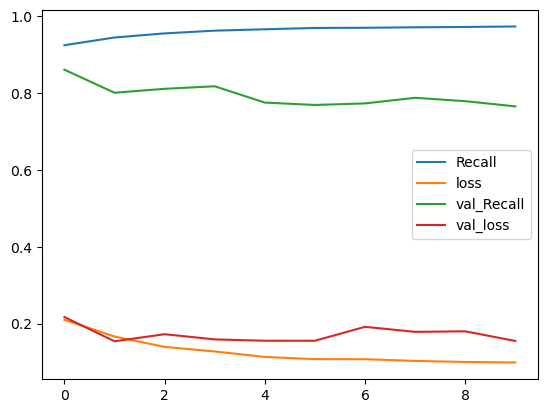

In [64]:
model_loss.plot()

In [65]:
model.evaluate(X_train, y_train)

6088/6088 ━━━━━━━━━━━━━━━━━━━━ 174s 28ms/step - Recall: 0.9801 - loss: 0.0673


[0.06780842691659927, 0.97943514585495]

In [66]:
model.evaluate(X_test, y_test)

1522/1522 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - Recall: 0.7534 - loss: 0.1555


[0.15500642359256744, 0.7652651071548462]

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

6088/6088 ━━━━━━━━━━━━━━━━━━━━ 178s 29ms/step
[[179330   4526]
 [   225  10716]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    183856
           1       0.70      0.98      0.82     10941

    accuracy                           0.98    194797
   macro avg       0.85      0.98      0.90    194797
weighted avg       0.98      0.98      0.98    194797



In [68]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

1522/1522 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step
[[44042  1923]
 [  642  2093]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     45965
           1       0.52      0.77      0.62      2735

    accuracy                           0.95     48700
   macro avg       0.75      0.86      0.80     48700
weighted avg       0.96      0.95      0.95     48700



1522/1522 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step


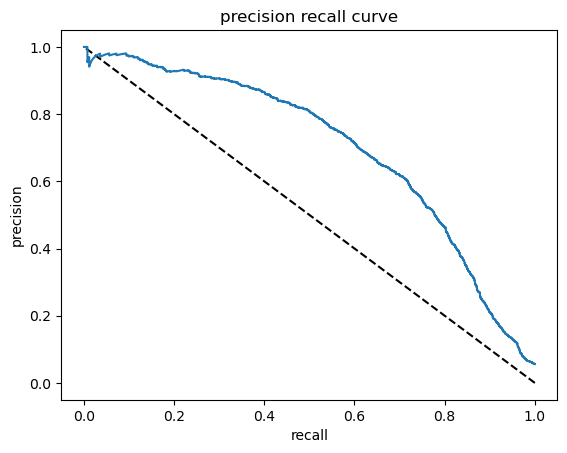

In [69]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba,)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [70]:
average_precision_score(y_test, y_pred_proba)

0.6997591829218874

##Scores without sample_weight

## Model Saving

##Loading Model

In [71]:
from tensorflow.keras.saving import save_model

save_model(model, 'review_hepsiburada.keras')

In [72]:
from tensorflow.keras.models import load_model
model_review = load_model('review_hepsiburada.keras')

C:\Users\mertu\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 62 variables whereas the saved optimizer has 44 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 3 objects could not be loaded. Example error message for object <LSTMCell name=lstm_cell, built=True>:

Layer 'lstm_cell' expected 3 variables, but received 0 variables during loading. Expected: ['kernel', 'recurrent_kernel', 'bias']

List of objects that could not be loaded:
[<LSTMCell name=lstm_cell, built=True>, <LSTMCell name=lstm_cell, built=True>, <LSTMCell name=lstm_cell, built=True>]

## Predicton

In [ ]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "üründe sıkıntı var"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. "
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

In [ ]:
(model_review.predict(tokens_pad) >0.5).astype("int")